# Assignment-11-Text Mining-Q1
**For Text Mining assignment-1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv) 2) Extract reviews of any product from ecommerce website like amazon 3) Perform emotion mining

### Importing necessary libraries

In [4]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


### Import Data

In [5]:
Elon = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
Elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Data Understanding

In [6]:
Elon.shape

(1999, 2)

In [7]:
Elon.dtypes

Unnamed: 0     int64
Text          object
dtype: object

### Data preparation

In [8]:
Elon.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
Elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text)      # Remove Mentions
    text = re.sub(r"#", "", text)                  # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text)            # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text)     # Remove The Hyper Links
    return text

Elon["Text"] = Elon["Text"].apply(cleantext)
Elon

,Text
0,Im an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


# Using TextBlob to genereate subjectivity and polarity

In [11]:
# Let's calculate subjectivity and polarity

# Subjectivity
def calc_sub(text):
    return TextBlob(text).sentiment.subjectivity

# Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

In [12]:
Elon['subjectivity'] = Elon.Text.apply(calc_sub)
Elon['polarity']     = Elon.Text.apply(calc_pola)

In [13]:
Elon

,Text,subjectivity,polarity
0,Im an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


### Classifying the sentiments

In [14]:
# Classify tweets based on polarity

def sentiment(polarity):
    result = ''
    if polarity > 0:
        result = 'Positive'
    elif polarity == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result
Elon['Sentiment'] = Elon.polarity.apply(sentiment)

In [15]:
Elon

,Text,subjectivity,polarity,Sentiment
0,Im an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Netural
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Netural
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Netural
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


# Visualizing the counts of different sentiments

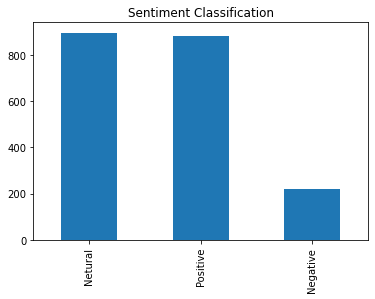

In [16]:
Elon.Sentiment.value_counts().plot(kind='bar')
plt.title('Sentiment Classification')
plt.show()

In [17]:
# Let's see the percentage of different sentiment's class

# creat
Df_Sentiment = pd.DataFrame(Elon.Sentiment.value_counts(normalize=True)*100)

# Calculating percentage
Df_Sentiment['Total'] = Elon.Sentiment.value_counts()

Df_Sentiment

,Sentiment,Total
Netural,44.822411,896
Positive,44.222111,884
Negative,10.955478,219


### We could see most of the tweeta are netural and positive as counts 896 & 884

### Plotting Wordcloud

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


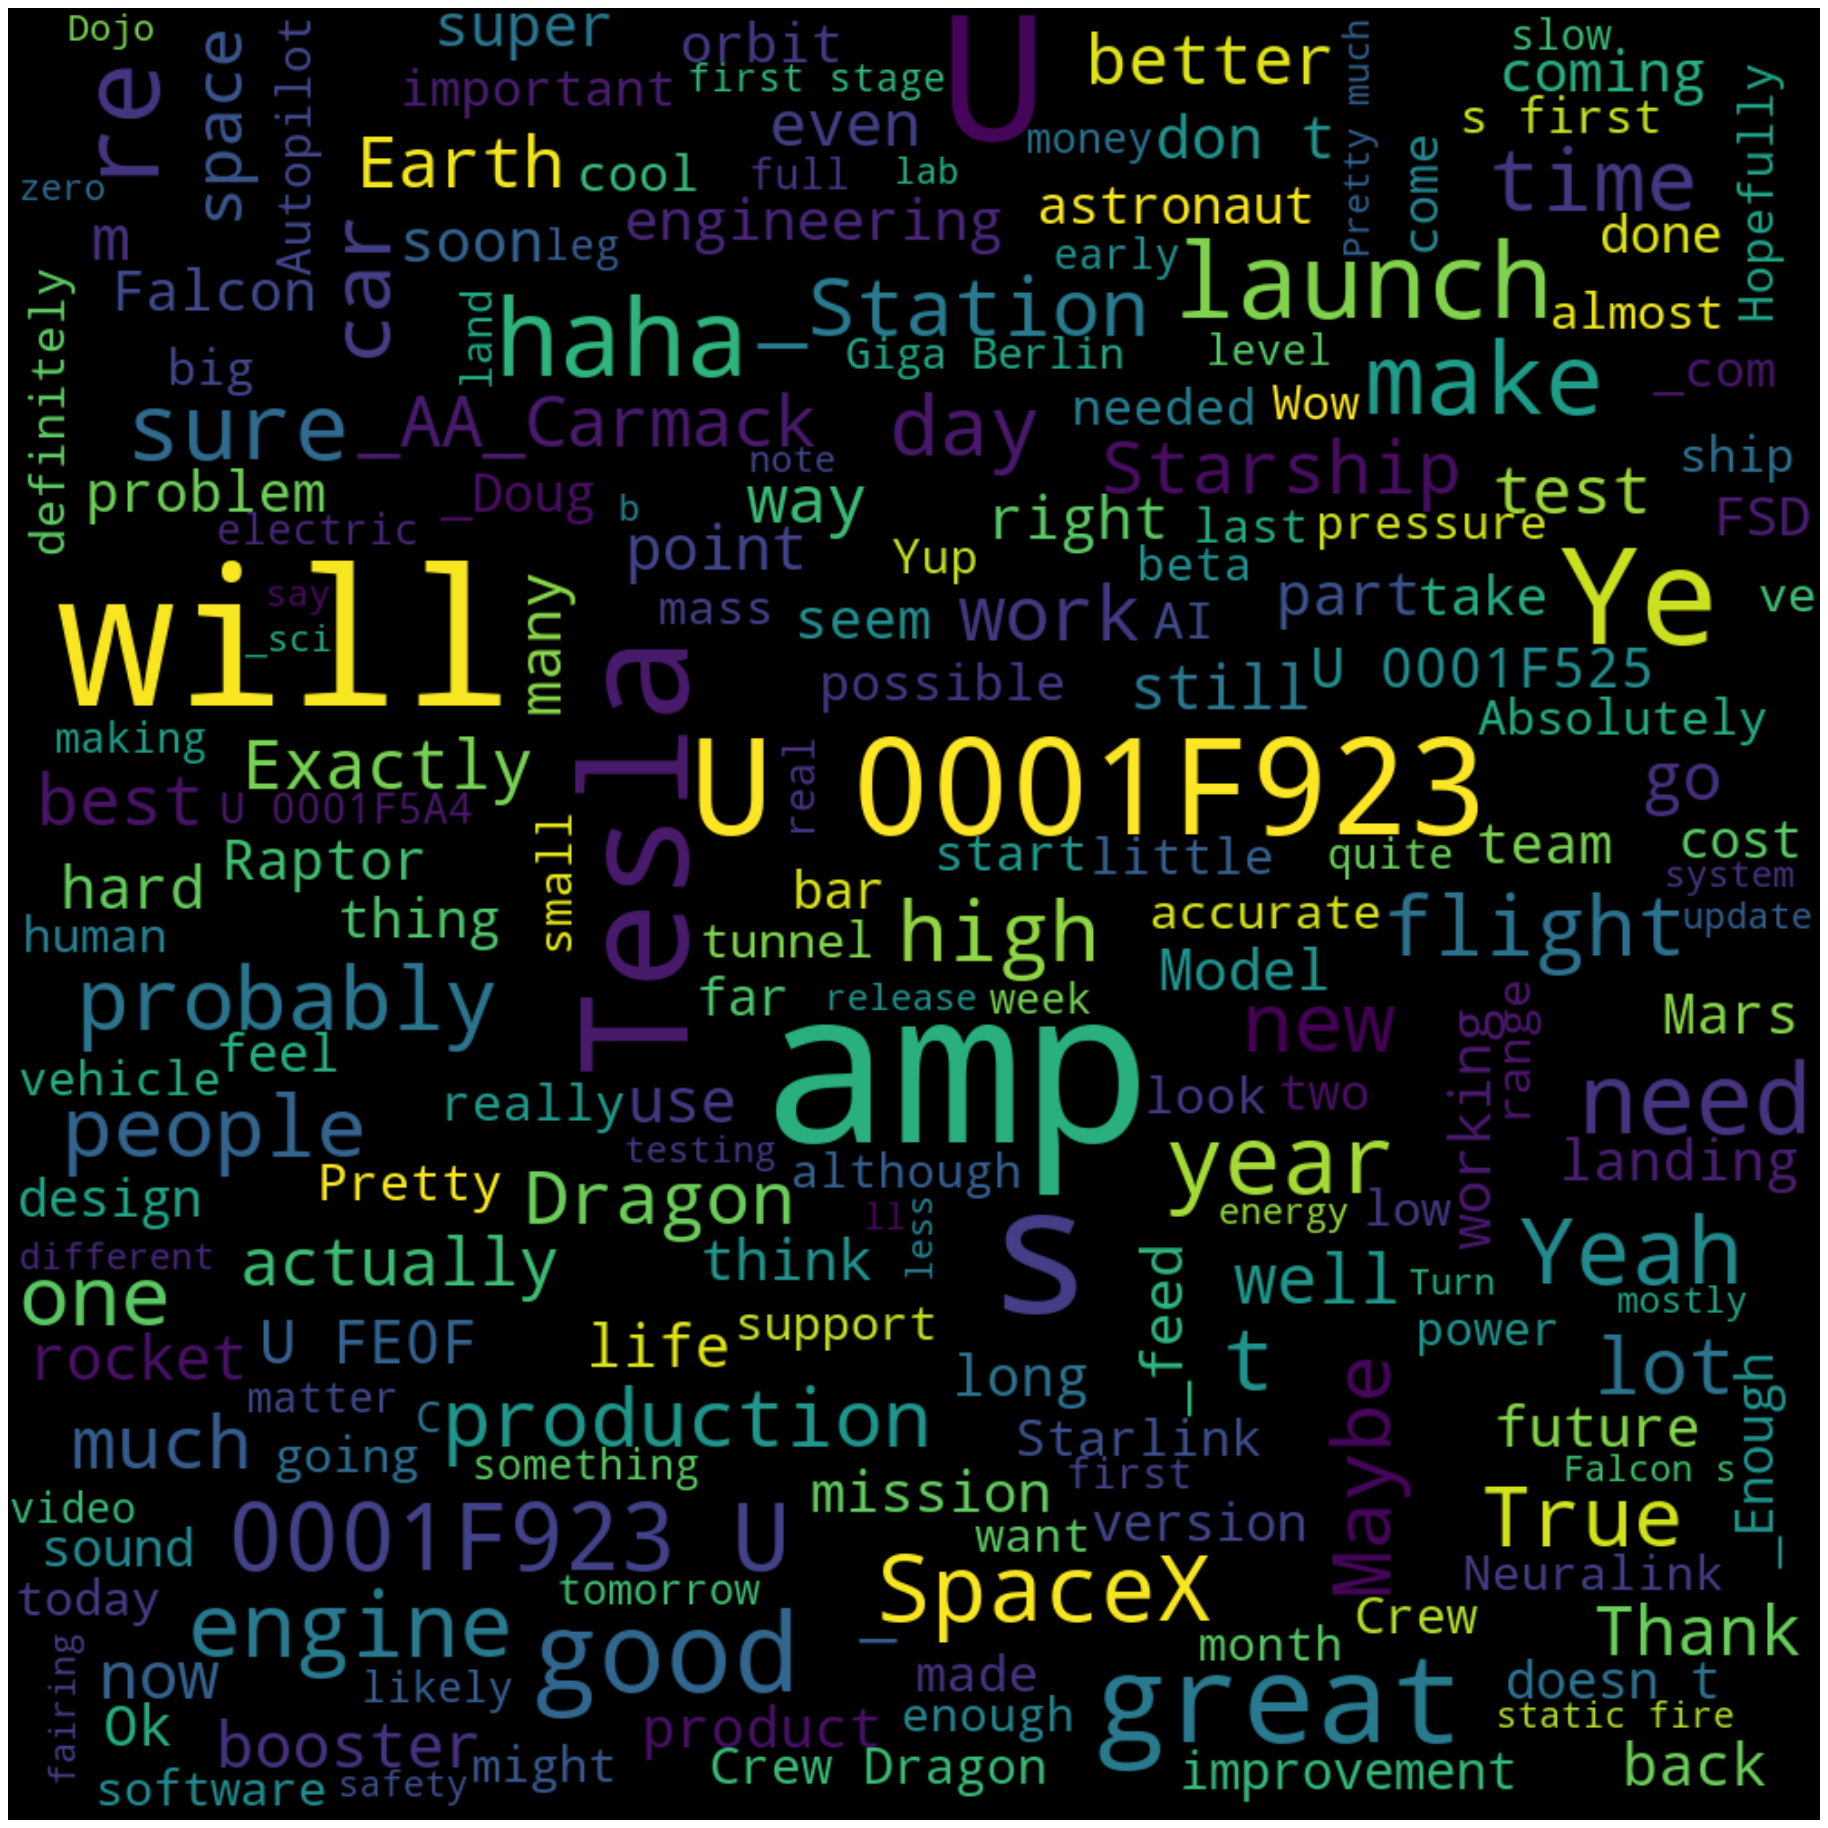

In [19]:
from wordcloud import WordCloud
allwords = ''.join([twts for twts in Elon['Text']])
wordcloud = WordCloud(width=1000,height=1000,random_state=21,max_font_size=120).generate(allwords)
plt.figure(figsize=(40,30),dpi=80)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### From the above wordcloud, we can see that SpaceX, Starship, Tesla , launch, landing,Starlink, Earts, Mars, etc are the most frequent words by Elon Musk. Most of the words used are related to his company Tesla and space and satellitles launching

# Scatter plot for polarity of tweets

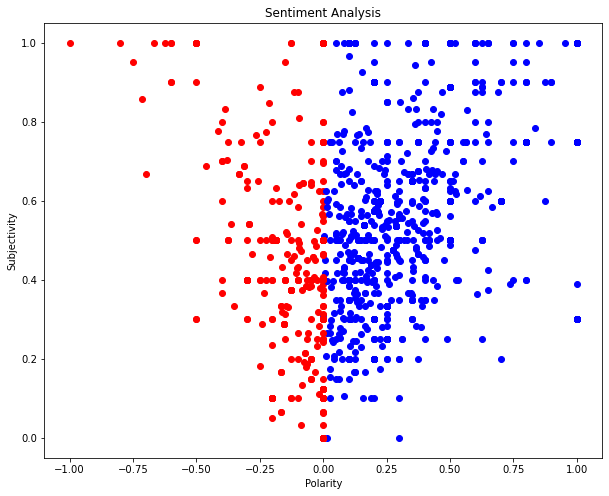

In [20]:
plt.figure(figsize=(10, 8))
for i in range(0, Elon.shape[0]):
    if(Elon["polarity"][i]>0):
        plt.scatter(Elon["polarity"][i], Elon["subjectivity"][i],color = 'Blue')
    else:
        plt.scatter(Elon["polarity"][i], Elon["subjectivity"][i],color = 'Red')
plt.title("Sentiment Analysis")                                                   
plt.xlabel("Polarity")                                                           
plt.ylabel("Subjectivity")                                                        
plt.show()

#### The tweets which are having polarity score more than 0 (positive words) are in blue colour and the below 0 are in red colour. We could see there are more positive tweets